In [1]:
%load_ext notexbook

In [2]:
%texify

<span class="badges">

[![myBinder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/leriomaggio/deep-learning-for-data-science/HEAD?filepath=1_ANN/1_mlp.ipynb)
    
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/leriomaggio/deep-learning-for-data-science/blob/main/1_ANN/1_mlp.ipynb)

[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/leriomaggio/deep-learning-for-data-science/blob/main/1_ANN/1_mlp.ipynb)
</span>

<span class="fn"><i>[Note]: </i> This notebook has been designed using the [$\text{no}\TeX\text{book}$](https://github.com/leriomaggio/notexbook-jupyter-theme) Jupyter notebook theme. <br />
Please **Trust** the notebook to automatically enable the theme. If you are viewing this notebook in **Google Colab**, these are the [instructions](https://github.com/leriomaggio/notexbook-jupyter-theme/tree/texbook-colab) to enable the theme in Colab.</span>

# Artificial Neural Networks

**This notebook will cover**:

* Getting a conceptual understanding of multi-layer neural networks;
* Training neural networks on artificially generated data;
* Implementing the backpropagation algorithm;
* Debugging neural network implementations.

## Perceptron (or Neural Network Neuron)

In machine learning and cognitive science, an artificial neural network (ANN)
is a network inspired by biological neural networks
which are used to estimate or approximate functions that can depend on a
large number of inputs that are generally unknown.

An ANN is built from nodes (neurons) stacked in layers between the feature
vector and the target vector.

A node in a neural network is built from Weights and Activation function.

An early version of ANN built from one node was called the **Perceptron**

<img src="imgs/Perceptron.png">

---

The Perceptron is an algorithm for supervised learning of binary classifiers.
functions that can decide whether an input (represented by a vector of numbers)
belongs to one class or another.

Much like logistic regression, the weights in a neural net are being multiplied
by the input vector summed up and fed into the activation function's input.

A Perceptron Network can be designed to have *multiple layers*,
leading to the **Multi-Layer Perceptron** (aka `MLP`)

<img src="imgs/MLP.png" class="maxw50">

### Plan:

- We will build the neural networks from first principles.
- We will create a very simple model and understand how it works.
- We will also be implementing backpropagation algorithm. 

**Please note that this code is not optimized and not to be used in production**. 

Libraries like `torch` have highly optimized code to do so.

---

#### Interlude: Vectorization


In [3]:
import numpy as np

In [4]:
def forloop(x, w):
    z = 0.
    for i in range(len(x)):
        z += x[i] * w[i]
    return z


def listcomprehension(x, w):
    return sum(x_i*w_i for x_i, w_i in zip(x, w))


def vectorized(x, w):
    return x_vec.dot(w_vec)


x, w = np.random.rand(100000), np.random.rand(100000)
x_vec, w_vec = np.array(x), np.array(w)

In [5]:
%timeit -r 100 -n 10 forloop(x, w)

40 ms ± 2.61 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [6]:
%timeit -r 100 -n 10 listcomprehension(x, w)

34.4 ms ± 1.85 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [7]:
%timeit -r 100 -n 10 vectorized(x_vec, w_vec)

The slowest run took 33.31 times longer than the fastest. This could mean that an intermediate result is being cached.
20.8 µs ± 36.1 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


### Perceptron and Adaline Models


If you want a sneak peek of alternate (production ready) implementation of _Perceptron_, try:
```python
from sklearn.linear_model import Perceptron
```

$\Rightarrow$ [What is the difference between a Perceptron, Adaline, and neural network model?](https://github.com/rasbt/python-machine-learning-book/blob/23853c58a3279a95048245cc8924a48f6316d915/faq/diff-perceptron-adaline-neuralnet.md)

**Binary Classification**

While we used the **activation** $\phi(z)$ to compute the gradient update, we may use a **threshold function** _(Heaviside step function)_ to squash the continuous-valued output into binary class labels for prediction:

$$
\hat{y} = 
\begin{cases}
    1 & \text{if } \phi(z) \geq 0 \\
    0 & \text{otherwise}
\end{cases}
$$

## Single Layer

<img src="imgs/single_layer.png" />

_(Source: Python Machine Learning, S. Raschka)_

### Weights Update Rule

- We use a **gradient descent** optimization algorithm to learn
the _Weights Coefficients_ of the model.
<br><br>
- In every **epoch** (pass over the training set), we update the weight vector
$w$ using the following update rule:

$$
w = w + \Delta w, \text{where } \Delta w = - \eta \nabla J(w)
$$

<br><br>

In other words, we computed the gradient based on the whole training set and updated
the weights of the model by taking a step into the **opposite direction**
of the gradient $ \nabla J(w)$.

In order to fin the **optimal weights of the model**, we optimized an objective
function (e.g. the Sum of Squared Errors (SSE)) cost function $J(w)$.

Furthermore, we multiply the gradient by a factor, the learning rate $\eta$ ,
which we choose carefully to balance the **speed of learning** against the risk of
overshooting the global minimum of the cost function.

### Gradient Descent

In **gradient descent optimization**, we update all the **weights simultaneously**
after each epoch, and we define the _partial derivative_ for each weight $w_j$
in the weight vector $w$ as follows:

$$
\frac{\partial}{\partial w_j} J(w) = \sum_{i} ( y^{(i)} - a^{(i)} )  x^{(i)}_j
$$

**Note**: _The superscript $(i)$ refers to the i-th sample.
The subscript $j$ refers to the j-th dimension/feature_


Here $y^{(i)}$ is the target class label of a particular sample $x^{(i)}$ ,
and $a^{(i)}$ is the **activation** of the neuron

(which is a linear function in the special case of _Perceptron_).

We define the **activation function** $\phi(\cdot)$ as follows:

$$
\phi(z) = z = a = \sum_{j} w_j x_j = \mathbf{w}^T \mathbf{x}
$$

## Introducing MLP architecture

<img src="imgs/multi-layers-1.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

Now we will see how to connect **multiple single neurons** to
a **multi-layer feedforward neural network**; this special type of network is
also called a **multi-layer perceptron** (MLP).

The figure shows the concept of an **MLP** consisting of three layers:
one _input_ layer, one _hidden_ layer, and one _output_ layer.

The units in the hidden layer are fully connected to the input layer,
and the output layer is fully connected to the hidden layer, respectively.

If such a network has **more than one hidden layer**,
we also call it a **deep artificial neural network**.


### Notation

we denote the `ith` activation unit in the `lth` layer as $a_i^{(l)}$ ,
and the activation units $a_0^{(1)}$ and
$a_0^{(2)}$ are the **bias units**, respectively, which we set equal to $1$. 
<br><br>
The _activation_ of the units in the **input layer** is just its input plus the bias unit:

$$
\mathbf{a}^{(1)} = [a_0^{(1)}, a_1^{(1)}, \ldots, a_m^{(1)}]^T = [1, x_1^{(i)}, \ldots, x_m^{(i)}]^T
$$
<br><br>
**Note**: $x_j^{(i)}$ refers to the jth feature/dimension of the ith sample

### Notes on Notation (usually) Adopted

The terminology around the indices (subscripts and superscripts)
may look a little bit confusing at first.
<br><br>

You may wonder why we wrote $w_{j,k}^{(l)}$ and not $w_{k,j}^{(l)}$ to refer to 
the **weight coefficient** that connects the *kth* unit in layer $l$ to the
jth unit in layer $l+1$.
<br><br>

What may seem a little bit quirky at first will make much more sense later
when we **vectorize** the neural network representation.
<br><br>

For example, we will summarize the weights that connect the input and
hidden layer by a matrix
$$ W^{(1)} \in \mathbb{R}^{h×[m+1]}$$

where $h$ is the number of hidden units and $m + 1$ is the number of
hidden units plus bias unit.

<img src="imgs/multi-layers-2.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

## Forward Propagation

* Starting at the input layer, we forward propagate the patterns of the training
data through the network to generate an output.

* Based on the network's output, we calculate the error that we want to minimize
using a cost function that we will describe later.

* We backpropagate the error, find its derivative with respect to each weight
in the network, and update the model.

### Sigmoid Activation

<img src="imgs/logistic_function.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

<img src="imgs/fwd_step.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

<img src="imgs/fwd_step_net.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

## Backward Propagation

The weights of each neuron are learned by **gradient descent**,
where each neuron's error is derived with respect to it's weight.

<img src="imgs/bkwd_step_net.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

Optimization is done for each layer with respect to the previous layer
in a technique known as **BackPropagation**.

<img src="imgs/backprop.png" width="50%">

(*The following code is inspired from [these](https://github.com/dennybritz/nn-from-scratch) terrific notebooks*)

In [8]:
from sklearn.datasets import make_moons

In [9]:
X, y = make_moons(n_samples=500, noise=0.1)


In [10]:
X.shape

(500, 2)

In [11]:
y.shape

(500,)

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

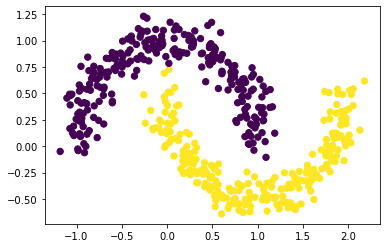

In [13]:
#Let's plot the dataset and see how it is
plt.scatter(X[:,0], X[:,1], s=40, c=y)
plt.show()

**Quick look** at the details

In [14]:
import random
random.seed(123)

# calculate a random number where:  a <= rand < b
def rand(a, b):
    return (b-a)*random.random() + a

**Where will it be used?**: 

When we initialize the neural networks, the weights have to be randomly assigned.

In [15]:
# Make a matrix 
def makeMatrix(I, J, fill=0.0):
    return np.zeros([I,J])

Define our activation function. Let's use sigmoid function

In [16]:
# our sigmoid function
def sigmoid(x):
    #return math.tanh(x)
    return 1/(1+np.exp(-x))

Derivative of our activation function. 

Note: We need this when we run the backpropagation algorithm


In [17]:
# derivative of our sigmoid function, in terms of the output (i.e. y)
def dsigmoid(y):
    # sig(y)*(1-sig(y))
    return y - y**2

In [18]:
class MLP:
    def __init__(self, ni, nh, no):
        # number of input, hidden, and output nodes
        self.ni = ni + 1  # +1 for bias node
        self.nh = nh
        self.no = no

        # activations for nodes
        self.ai = [1.0] * self.ni
        self.ah = [1.0] * self.nh
        self.ao = [1.0] * self.no

        # create weights
        self.wi = self.makeMatrix(self.ni, self.nh)
        self.wo = self.makeMatrix(self.nh, self.no)

        # set them to random vaules
        for i in range(self.ni):
            for j in range(self.nh):
                self.wi[i][j] = rand(-0.2, 0.2)
        for j in range(self.nh):
            for k in range(self.no):
                self.wo[j][k] = rand(-2.0, 2.0)

    @staticmethod
    def makeMatrix(I, J, fill=0.0):
        return np.zeros([I, J])

    @staticmethod
    def sigmoid(x):
        # return math.tanh(x)
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def dsigmoid(y):
        return y - y ** 2

    def backward(self, targets, eta):

        if len(targets) != self.no:
            print(targets)
            raise ValueError("wrong number of target values")

        # calculate error terms for output
        output_deltas = np.zeros(self.no)
        for k in range(self.no):
            error = targets[k] - self.ao[k]
            output_deltas[k] = self.dsigmoid(self.ao[k]) * error

        # calculate error terms for hidden
        hidden_deltas = np.zeros(self.nh)
        for j in range(self.nh):
            error = 0.0
            for k in range(self.no):
                error += output_deltas[k] * self.wo[j][k]
            hidden_deltas[j] = self.dsigmoid(self.ah[j]) * error

        # update output weights
        for j in range(self.nh):
            for k in range(self.no):
                change = output_deltas[k] * self.ah[j]
                self.wo[j][k] += eta * change

        # update input weights
        for i in range(self.ni):
            for j in range(self.nh):
                change = hidden_deltas[j] * self.ai[i]
                self.wi[i][j] += eta * change

        # calculate error
        error = 0.0
        for k in range(len(targets)):
            error += 0.5 * (targets[k] - self.ao[k]) ** 2
        return error

    def predict(self, patterns):
        self.preds_ = np.empty([len(patterns), self.no])
        for i, p in enumerate(patterns):
            self.preds_[i] = self.forward(p)

    def forward(self, inputs):

        if len(inputs) != self.ni - 1:
            print(inputs)
            raise ValueError("wrong number of inputs")

        # input activations
        for i in range(self.ni - 1):
            self.ai[i] = inputs[i]

        # hidden activations
        for j in range(self.nh):
            sum_h = 0.0
            for i in range(self.ni):
                sum_h += self.ai[i] * self.wi[i][j]
            self.ah[j] = self.sigmoid(sum_h)

        # output activations
        for k in range(self.no):
            sum_o = 0.0
            for j in range(self.nh):
                sum_o += self.ah[j] * self.wo[j][k]
            self.ao[k] = self.sigmoid(sum_o)

        return self.ao[:]

    def fit(self, patterns, iterations=1000, eta=0.5):
        # N: learning rate
        patterns = list(patterns)
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.forward(inputs)
                error += self.backward([targets], eta)
            if i % 5 == 0:
                print("error in interation %d : %-.5f" % (i, error))
        print("Final training error: %-.5f" % error)

### Running the model on our dataset

In [19]:
# create a network with two inputs, one hidden, and one output nodes
mlp = MLP(2, 1, 1)

%timeit -n 1 -r 1 mlp.fit(zip(X,y), iterations=2)

error in interation 0 : 53.57366
Final training error: 46.82875
31 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Predicting on training dataset and measuring in-sample accuracy

In [20]:
%timeit -n 1 -r 1 mlp.predict(X)

6.09 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [21]:
print(np.asarray(y[:30], dtype=np.float))
print(np.ravel(mlp.predict)[:30])

[1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 1. 0. 0. 1.]
[<bound method MLP.predict of <__main__.MLP object at 0x7ffaf45e7d00>>]


### Let's visualize and observe the results

In [22]:
# Helper function to plot a decision boundary.
# This generates the contour plot to show the decision boundary visually
def plot_decision_boundary(nn_model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    nn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = nn_model.preds_
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.BuGn)

Text(0.5, 1.0, 'Our initial model')

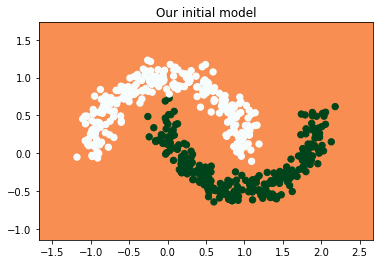

In [23]:
plot_decision_boundary(mlp)
plt.title("Our initial model")

**Exercise**: 

Create Neural networks with 10 hidden nodes on the above code. 

What's the impact on accuracy?

In [ ]:
mlp = MLP(2, 10, 1)
%timeit -n 1 -r 1 mlp.fit(zip(X,y), iterations=2)
plot_decision_boundary(mlp)
plt.title("Our next model with 10 hidden units")

**Exercise:**

Train the neural networks by increasing the epochs. 

What's the impact on accuracy?

In [ ]:
mlp = MLP(2, 10, 1)
%timeit -n 1 -r 1 mlp.fit(zip(X,y), iterations=100)
plot_decision_boundary(mlp)
plt.title("Our next model with 10 hidden units")

# Addendum

Another terrific reference to start is the online book http://neuralnetworksanddeeplearning.com/. Highly recommended!  